# CONV1 : Réponse d'un système LTI
---
Prenons, par exemple, un système dont ma réponse impulsionnelle est $h[k]=e^{-\alpha.k.T_e}.u[k]$

Remarquons qu'une exponentielle discrétisée est une suite géométrique de raison $a=e^{-\alpha.T_e}$ puisque

$e^{-\alpha.k.T_e} = (e^{-\alpha.T_e})^k = a^k$

On utilise la fonction échelon unité discrète $u$ pour rendre le signal causal


## Tracé de h
---

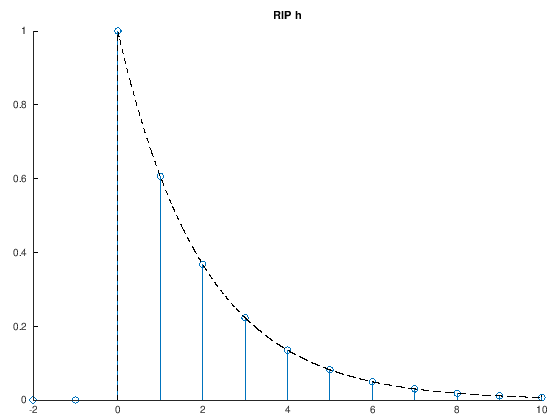

In [1]:
clear all;
k = (-2:10)';      % vecteur temps infini ou presque
u = @(k) (k>=0);   % fonction echelon unité vectorisé

Te=1;
alpha = 0.5;

h = @(k) exp(-alpha*Te*k) .* u(k);  
stem(k,h(k)); hold on;
t = -2:0.001:10;    % vecteur presque continu
plot(t,exp(-alpha*t) .* u(t),'--k');
title('RIP h');


## Décomposition du signal d'entré dans la base temporelle
---
Prenons un signal d'entré sous forme d'une série bornée (0,1,2,3,4) soit $x[k]=k.u[k-1] . \Pi_{[0, 4][k]}$.

On peut le décomposer dans une base temporelle faites d'impulsions unités $\delta_j$ :
$\vec{x[k]} = \sum_j x[j].\vec{\delta_{j}[k]}$

Rappelons-nous bien que $x[j]$ n'est pas un signal mais la composante à l'instant $j$ du signal $k$ obtenue par projection sur la base :

$$ x[j] = <\!<\vec{x}, \vec{\delta_j} >\!> = \sum_k \vec{x}[k].\overline{\vec{\delta_j}[k]} $$


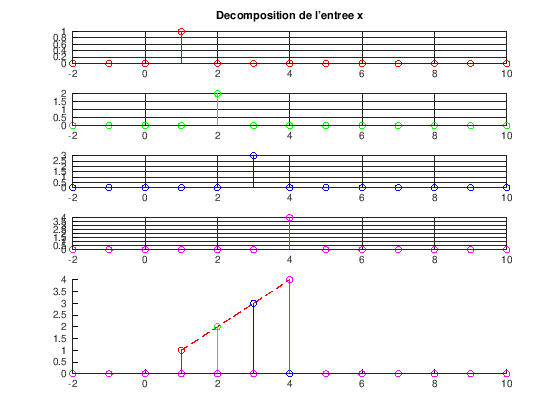

In [2]:
r = @(k) k.*u(k);      % fonction rampe vectorisée
delta = @(k) k==0;     % impulsion unité

x = @(k) (k.*u(k-1)).*u(-k+4);  
subplot(6,1,[5,6])
stem(k,x(k)); hold on;
plot(t,x(t),'--r')

couleur = ['r','g','b','m'];
for j = 1:4
    subplot(6,1,j); 
    stem(k,delta(k-j)*x(j),couleur(j));grid on;
    subplot(6,1,[5,6])
    stem(k,delta(k-j)*x(j),couleur(j))
end
subplot(6,1,1); title("Decomposition de l'entree x")


## Convolution : somme des réponses impulsionnelles
---

Profitons de la propriété d'invariance pour tracer toutes les réponses à des impulsions de la base temporelle :

$$ H\{\delta_j[\bullet]\} = H\{\delta[\bullet-j]\} = H\{\delta\}[\bullet-j]$$

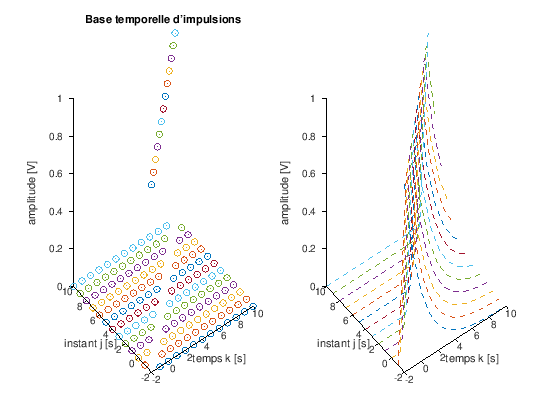

In [3]:
j = k';

Mt = delta(k-j);
Mh = h(k-j);

% affichage 
unst = k==k;
unstau = j==j;
subplot(121)
plot3(k*unstau,unst*j,Mt,'o');
xlabel('temps k [s]')
ylabel('instant j [s]')
zlabel('amplitude [V]')
title('Base temporelle d''impulsions')
subplot(122)
plot3(k*unstau,unst*j,Mh,'--');
xlabel('temps k [s]')
ylabel('instant j [s]')
zlabel('amplitude [V]')



Maintenant profitons de la linéarité du système H :

$$ H\{\lambda.\vec{u}+\vec{v}\} = \lambda.H\{\vec{u}\}+H\{\vec{v}\}$$

et donc

$$ H\left\{\sum_j x[j] . \vec{\delta_j}\right\} = \sum_j x[j]. H\{\vec{\delta_j}\}$$


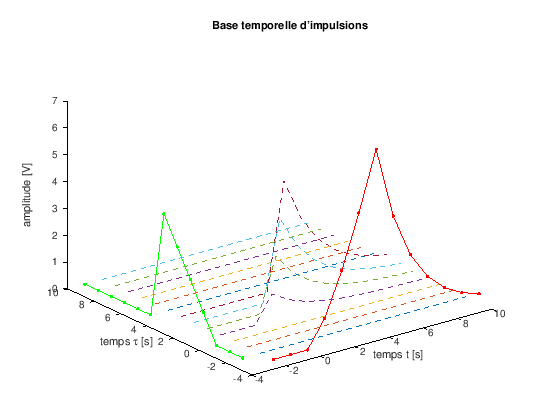

In [4]:
Mxt = Mh.*x(j); % 
Mconv = Mh.*x(j);

%La somme sur tau de ces vecteurs
g_reconstruit = Mconv * unstau';
conv = Mconv * unstau';

% affichage 
unst = k==k;
unstau = j==j;
plot3(k*unstau,unst*j,Mxt,'--');
hold on;
plot3(j*0-3,j,x(j),'g.-')
plot3(k,k*0-3,g_reconstruit,'r.-')
xlabel('temps t [s]')
ylabel('temps \tau [s]')
zlabel('amplitude [V]')
title('Base temporelle d''impulsions')